# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Description/Loading

The Dry Bean Dataset contains information about the characteristics of different varieties of dry beans. WIthin it, there are 16 numeric columns that serves as descriptors of that said bean. This dataset contains various attributes such as shape, form, texture, and other characteristics of dry beans, along with their class labels indicating the bean's variety.

In [2]:
dry_bean_data = pd.read_csv('./Dry_Bean_Dataset.csv')

In [3]:
dry_bean_data.shape

(13611, 17)

In [4]:
dry_bean_data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [5]:
dry_bean_data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [6]:
dry_bean_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


| Column Name      | Description                                                                                                    |
|------------------|----------------------------------------------------------------------------------------------------------------|
| Area             | Area of a bean zone and the number of pixels within its boundaries.                                            |
| Perimeter        | Perimeter of a bean zone (the length of its border).                                                           |
| MajorAxisLength  | The length of the major axis of an ellipse that has the same normalized second central moments as the region. |
| MinorAxisLength  | The length of the minor axis of an ellipse that has the same normalized second central moments as the region. |
| AspectRatio      | Ratio of the length of the major axis to the length of the minor axis.                                          |
| Eccentricity     | Eccentricity of the ellipse that has the same normalized second central moments as the region.                 |
| ConvexArea       | Number of pixels in the smallest convex polygon that can contain the bean area.                                 |
| EquivalentDiameter | Diameter of a circle with the same area as the bean area.                                                     |
| Extent           | Ratio of the number of pixels in the convex hull to the number of pixels in the bean area.                    |
| Solidity         | Ratio of the number of pixels in the bean area to the number of pixels in the convex hull.                     |
| Roundness        | Measure of the roundness of a bean.                                                                           |
| Compactness      | Measure of the compactness of a bean.                                                                         |
| ShapeFactor1     | Measure of the shape of a bean.                                                                               |
| ShapeFactor2     | Measure of the shape of a bean.                                                                               |
| ShapeFactor3     | Measure of the shape of a bean.                                                                               |
| ShapeFactor4     | Measure of the shape of a bean.                                                                               |
| Class            | Variety of dry beans (e.g., SEKER, BARBUNYA, BOMBAY, CALI, etc.). 

# Bean Classes

In [7]:
dry_bean_data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

# Data Exploration

In [8]:
dry_bean_data.corr(numeric_only=True)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


<Axes: >

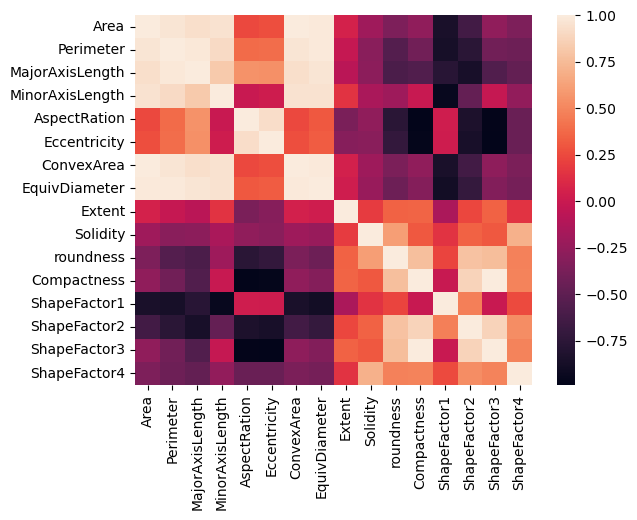

In [9]:
import seaborn as sns

corr=dry_bean_data.corr(numeric_only=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Based off the correllation plot and table, we can immediately identify predictors that have both very high correlations such as Perimeter and Area, no correlation such as EquivDiameter and Extent, and a high negative correlation such as Compactness and eccentricity. However, we see based on the correlation plot that there are many columns with similar traits having high correlations, indicating multicollinearity which will have to be addressed later.

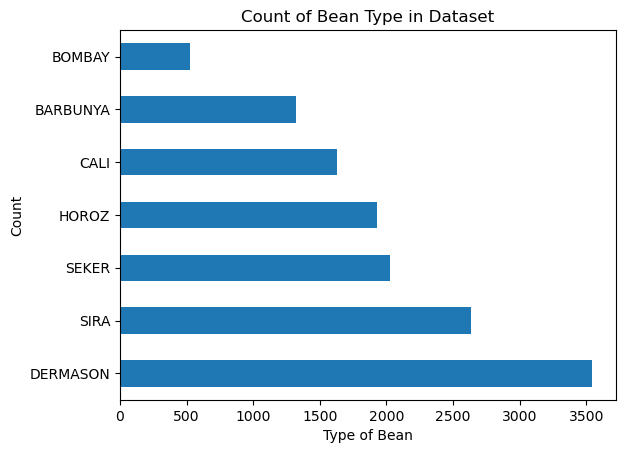

In [10]:
dry_bean_data.Class.value_counts().plot(kind = 'barh')
plt.xlabel('Type of Bean')
plt.ylabel('Count')
plt.title('Count of Bean Type in Dataset')
plt.show()

# Cleaning Data/Sample Generation

In [11]:
# Checking for null values
null_counts = dry_bean_data.isnull().sum()
print(null_counts)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [12]:
# generating a sample of 2000
dry_bean_data = dry_bean_data.sample(n=2000, random_state=42)

# Base Implementation

In [13]:
X = dry_bean_data.drop('Class', axis=1)
y = dry_bean_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6425
              precision    recall  f1-score   support

    BARBUNYA       0.14      0.03      0.05        35
      BOMBAY       1.00      1.00      1.00        13
        CALI       0.69      0.87      0.77        53
    DERMASON       0.73      0.87      0.79        83
       HOROZ       0.62      0.57      0.60        68
       SEKER       0.51      0.32      0.39        60
        SIRA       0.59      0.76      0.66        88

    accuracy                           0.64       400
   macro avg       0.61      0.63      0.61       400
weighted avg       0.60      0.64      0.61       400



Immediately, we can observe that our model is a bit lackluster but there are changes that we can make to increase all our metrics. It is also interesting to note that the Bombay bean had 100% prediction success.

Two immediate changes that will be made are one hot encoding and scaling of the data.

# One Hot Encoding

In [14]:
X = dry_bean_data.drop('Class', axis=1)
y = dry_bean_data['Class']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6425
              precision    recall  f1-score   support

           0       0.14      0.03      0.05        35
           1       1.00      1.00      1.00        13
           2       0.69      0.87      0.77        53
           3       0.73      0.87      0.79        83
           4       0.62      0.57      0.60        68
           5       0.51      0.32      0.39        60
           6       0.59      0.76      0.66        88

    accuracy                           0.64       400
   macro avg       0.61      0.63      0.61       400
weighted avg       0.60      0.64      0.61       400



Encoding does not change anything, therefore, we know SVM handles multiclassification problems appropriately. We will not use the encodings for the sake of simple interprations.

# Scale the Data

In [15]:
X = dry_bean_data.drop('Class', axis=1)
y = dry_bean_data['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9275
              precision    recall  f1-score   support

    BARBUNYA       0.89      0.89      0.89        35
      BOMBAY       1.00      1.00      1.00        13
        CALI       1.00      0.94      0.97        53
    DERMASON       0.91      0.93      0.92        83
       HOROZ       0.97      0.96      0.96        68
       SEKER       0.95      0.95      0.95        60
        SIRA       0.87      0.89      0.88        88

    accuracy                           0.93       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.93      0.93      0.93       400



Scaling the data seemed effective in increasing our model metrics

## Further Model Improvements
* change the kernels to assess which one performs better
* remove some irrelevant columns to increase the classification scores as SVM tends to work better with less features.

### First assessing kernels on the scaled dataset:

In [16]:
X = dry_bean_data.drop('Class', axis=1)
y = dry_bean_data['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9425
              precision    recall  f1-score   support

    BARBUNYA       0.90      1.00      0.95        35
      BOMBAY       1.00      1.00      1.00        13
        CALI       1.00      0.94      0.97        53
    DERMASON       0.91      0.95      0.93        83
       HOROZ       0.97      0.97      0.97        68
       SEKER       1.00      0.93      0.97        60
        SIRA       0.90      0.89      0.89        88

    accuracy                           0.94       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.94      0.94      0.94       400



In [17]:
X = dry_bean_data.drop('Class', axis=1)
y = dry_bean_data['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = SVC(kernel='poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8825
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.60      0.72        35
      BOMBAY       1.00      1.00      1.00        13
        CALI       0.98      0.85      0.91        53
    DERMASON       1.00      0.82      0.90        83
       HOROZ       0.97      0.94      0.96        68
       SEKER       0.98      0.93      0.96        60
        SIRA       0.68      0.98      0.80        88

    accuracy                           0.88       400
   macro avg       0.93      0.87      0.89       400
weighted avg       0.91      0.88      0.89       400



Proceed with RBF

# Feature Selection

## Importance

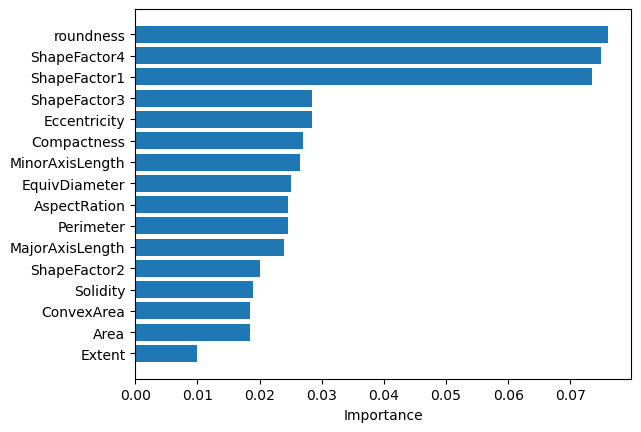

In [18]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)

perm_importance = permutation_importance(svc, X_test, y_test)

feature_names = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Importance")
plt.show()

Drop features below the 0.03 importance threshold.

In [19]:
# remove features with less than .03 importance.
f = features[sorted_idx]
p = perm_importance.importances_mean[sorted_idx]
features_removed = []
for i in range(len(f)):
    if p[i] < .0265:
        features_removed.append(f[i])

In [20]:
features_removed.append('Class')
features_removed

['Extent',
 'Area',
 'ConvexArea',
 'Solidity',
 'ShapeFactor2',
 'MajorAxisLength',
 'Perimeter',
 'AspectRation',
 'EquivDiameter',
 'MinorAxisLength',
 'Class']

In [21]:
# remove irrelevant columns and target
X = dry_bean_data.drop(features_removed, axis=1)
y = dry_bean_data['Class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = SVC(kernel='rbf')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))



Accuracy: 0.9375
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.97      0.94        35
      BOMBAY       1.00      1.00      1.00        13
        CALI       0.98      0.96      0.97        53
    DERMASON       0.91      0.94      0.92        83
       HOROZ       0.96      0.97      0.96        68
       SEKER       0.97      0.93      0.95        60
        SIRA       0.91      0.88      0.89        88

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.94      0.94      0.94       400



In [22]:
# remove irrelevant columns and target
X = dry_bean_data.drop(['Class', 'Eccentricity','ShapeFactor2','Area','Extent','Solidity','EquivDiameter','Perimeter',
                       'Compactness'], axis=1)
y = dry_bean_data['Class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = SVC(kernel='rbf')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))



Accuracy: 0.9425
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.97      0.96        35
      BOMBAY       1.00      1.00      1.00        13
        CALI       1.00      0.98      0.99        53
    DERMASON       0.91      0.94      0.92        83
       HOROZ       0.97      0.97      0.97        68
       SEKER       1.00      0.93      0.97        60
        SIRA       0.88      0.89      0.88        88

    accuracy                           0.94       400
   macro avg       0.96      0.95      0.96       400
weighted avg       0.94      0.94      0.94       400



Many attempts of combinations later, the best model produced was:

In [23]:
# Attempt many
X = dry_bean_data.drop(['Class', 'ShapeFactor2', 'EquivDiameter'], axis=1)
y = dry_bean_data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = SVC(kernel='rbf')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))



Accuracy: 0.945
              precision    recall  f1-score   support

    BARBUNYA       0.90      1.00      0.95        35
      BOMBAY       1.00      1.00      1.00        13
        CALI       1.00      0.94      0.97        53
    DERMASON       0.91      0.96      0.94        83
       HOROZ       0.97      0.97      0.97        68
       SEKER       1.00      0.93      0.97        60
        SIRA       0.91      0.89      0.90        88

    accuracy                           0.94       400
   macro avg       0.95      0.96      0.96       400
weighted avg       0.95      0.94      0.95       400



## Confusion Matrix

In [24]:
print(confusion_matrix(y_test, y_pred))

[[35  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 2  0 50  0  0  0  1]
 [ 0  0  0 80  0  0  3]
 [ 0  0  0  0 66  0  2]
 [ 2  0  0  0  0 56  2]
 [ 0  0  0  8  2  0 78]]


## PCA

In [25]:
from sklearn.decomposition import PCA

# Instantiate PCA with the desired number of components
pca = PCA(n_components=8)  # You can adjust the number of components as needed

# Fit PCA to the scaled feature matrix
X_pca = pca.fit_transform(X_scaled)

# Split the transformed feature matrix into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM model on the transformed feature matrix
model_pca = SVC(kernel='rbf')
model_pca.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred_pca = model_pca.predict(X_test_pca)

# Evaluate the performance of the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy (with PCA):", accuracy_pca)
print(classification_report(y_test, y_pred_pca))


Accuracy (with PCA): 0.945
              precision    recall  f1-score   support

    BARBUNYA       0.90      1.00      0.95        35
      BOMBAY       1.00      1.00      1.00        13
        CALI       1.00      0.94      0.97        53
    DERMASON       0.91      0.96      0.94        83
       HOROZ       0.97      0.97      0.97        68
       SEKER       1.00      0.93      0.97        60
        SIRA       0.91      0.89      0.90        88

    accuracy                           0.94       400
   macro avg       0.95      0.96      0.96       400
weighted avg       0.95      0.94      0.95       400



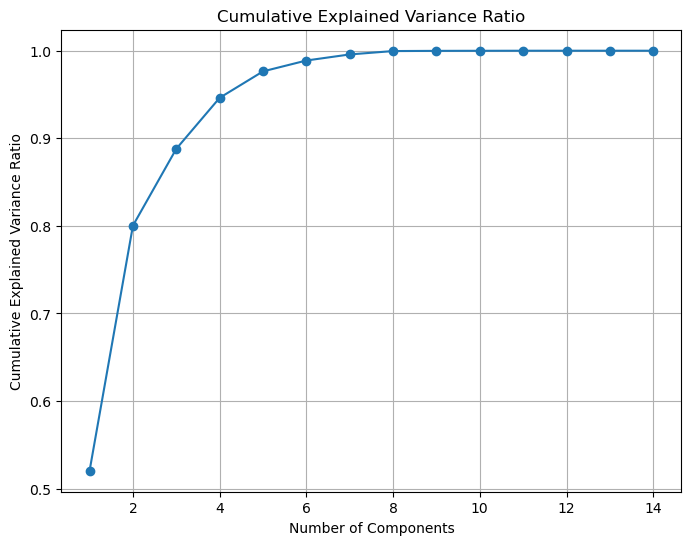

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA to the scaled feature matrix
pca = PCA().fit(X_scaled)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


PCA performed the exact same as our final SVM model without PCA. Based off the variance curve, we see that 8 components offered the simplest model while still capturing the same amount of variance, hence why the accuracy has been leveling off at .945. PCA does offer one more feature however:

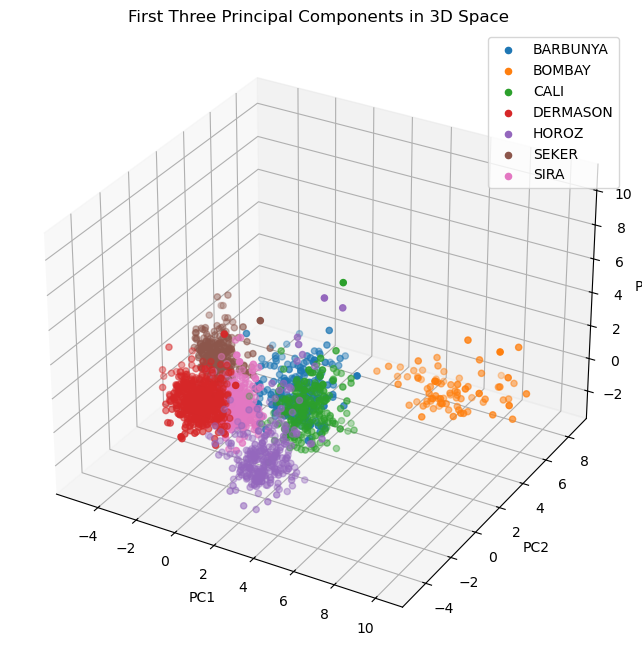

In [27]:
X = dry_bean_data.drop(['Class', 'ShapeFactor2', 'EquivDiameter'], axis=1)
y = dry_bean_data['Class'] 

pca = PCA(n_components=3)
pca.fit(X)

transformed_data=pca.transform(X)
PC1 = X_pca[:, 0]
PC2 = X_pca[:, 1]
PC3 = X_pca[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


classes = np.unique(y)
for c in classes:
    class_mask = (y == c)
    ax.scatter(PC1[class_mask], PC2[class_mask], PC3[class_mask], label=c)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('First Three Principal Components in 3D Space')

ax.legend()

plt.show()

This shows that Bombay Beans kept on generating perfect results, as they were so much more seperated from the rest, making it easier for SVM to predict

# Final Conclusions

### BARBUNYA:
- **Precision**: The model achieved a precision of 90% for predicting BARBUNYA beans. This means that out of all the instances predicted as BARBUNYA, 90% were actually BARBUNYA.
- **Recall**: The recall score of 100% indicates that the model correctly identified all BARBUNYA beans in the dataset.
- **F1-score**: The F1-score, which is the harmonic mean of precision and recall, is 95%. It balances precision and recall and is useful for evaluating a model's overall performance.
- **Support**: There are 35 instances of BARBUNYA beans in the test set.

### BOMBAY:
- **Precision**: The precision for BOMBAY beans is 100%, indicating that all instances predicted as BOMBAY were correct.
- **Recall**: With a recall score of 100%, the model identified all instances of BOMBAY beans in the dataset.
- **F1-score**: The F1-score of 100% reflects the model's perfect performance for BOMBAY beans.
- **Support**: There are 13 instances of BOMBAY beans in the test set.

### CALI:
- **Precision**: The precision for CALI beans is 100%, indicating that all instances predicted as CALI were correct.
- **Recall**: The recall score of 94% indicates that the model correctly identified 94% of CALI beans in the dataset.
- **F1-score**: The F1-score of 97% reflects the balance between precision and recall for CALI beans.
- **Support**: There are 53 instances of CALI beans in the test set.

### DERMASON, HOROZ, SEKER, and SIRA:
- Each of these bean types had similar precision, recall, and F1-score metrics, so summarized them together.
- **Precision**: The precision for each bean type is above 90%, indicating high accuracy in predicting these classes.
- **Recall**: Recall scores range from 89% to 97%, indicating strong performance in identifying instances of these bean types.
- **F1-score**: F1-scores range from 90% to 97%, indicating a good balance between precision and recall for these classes.
- **Support**: The number of instances varies for each bean type, with DERMASON having the highest support at 83 instances and SEKER having the lowest at 60 instances.

### Overall Performance:
- **Accuracy**: The overall accuracy of the model is 94.5%, indicating that it correctly classified 94.5% of instances in the test set.
- **Macro Avg**: The macro average precision, recall, and F1-score are all around 95-96%, indicating good overall performance across all classes.
- **Weighted Avg**: The weighted average precision, recall, and F1-score are similar to the macro average, reflecting balanced performance considering class imbalance.

### Confusion Matrix:
From the confusion matrix, we can see that most of the misclassifications occur between similar bean types, such as DERMASON and SIRA. Overall, the model demonstrates strong performance across different bean types, with some variability in performance between classes.

# Compare to Logistic

In [28]:
X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.2, random_state=123)
model = LogisticRegression(max_iter=1000, fit_intercept=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.805


C:\Users\aiman\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
